![us_bank_stadium_superbowl_2018](us_bank_stadium_superbowl_2018.png)

Whether or not you like football, the Super Bowl is a spectacle. There's a little something for everyone at your Super Bowl party. Drama in the form of blowouts, comebacks, and controversy for the sports fan. There are the ridiculously expensive ads, some hilarious, others gut-wrenching, thought-provoking, and weird. The half-time shows with the biggest musicians in the world, sometimes riding giant mechanical tigers or leaping from the roof of the stadium. 

The dataset we'll use was scraped and polished from Wikipedia. It is made up of three CSV files, one with game data, one with TV data, and one with halftime musician data for 52 Super Bowls through 2018. 

## The Data

Three datasets have been provided, and summaries and previews of each are presented below.

### 1. **halftime_musicians.csv**

This dataset contains information about the musicians who performed during the halftime shows of various Super Bowl games. The structure is shown below, and it applies to all remaining files.

| Column       | Description                                                                                  |
|--------------|----------------------------------------------------------------------------------------------|
| `'super_bowl'` | The Super Bowl number (e.g., 52 for Super Bowl LII).                                         |
| `'musician'`   | The name of the musician or musical group that performed during the halftime show.           |
| `'num_songs'`  | The number of songs performed by the musician or group during the halftime show.             |

### 2. **super_bowls.csv**

This dataset provides details about each Super Bowl game, including the date, location, participating teams, and scores, including the points difference between the winning and losing team (`'difference_pts'`).

### 3. **tv.csv**

This dataset contains television viewership statistics and advertisement costs related to each Super Bowl.

In [1]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load the CSV data into DataFrames
super_bowls = pd.read_csv("datasets/super_bowls.csv")
super_bowls.head()

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [3]:
tv = pd.read_csv("datasets/tv.csv")
tv.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


In [4]:
halftime_musicians = pd.read_csv("datasets/halftime_musicians.csv")
halftime_musicians.head()

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


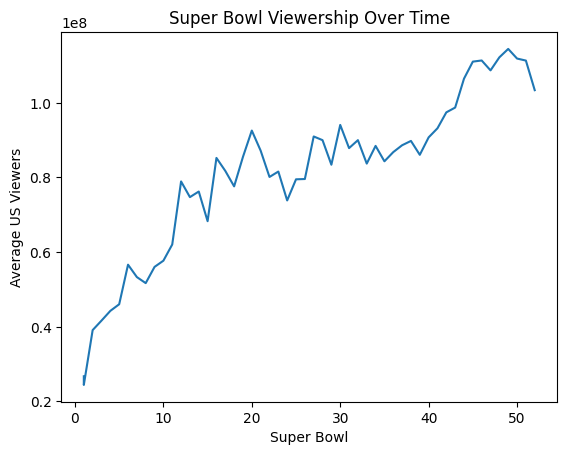

In [5]:
# Start coding here
# Use as many cells as you need
# Sort the DataFrame by 'super_bowl' in ascending order
tv = tv.sort_values('super_bowl')
# Plot the trend
plt.figure()
plt.plot(tv['super_bowl'], tv['avg_us_viewers'])
plt.xlabel('Super Bowl')
plt.ylabel('Average US Viewers')
plt.title('Super Bowl Viewership Over Time')
plt.show()

In [6]:
# Increase or decrease
# viewership_increased = True
viewership_increased = tv['avg_us_viewers'].iloc[-1] > tv['avg_us_viewers'].iloc[0]
print("Viewership increased:", viewership_increased)

Viewership increased: True


In [7]:
# Filter the DataFrame for more than 40 point difference
blowouts = super_bowls[super_bowls['difference_pts'] > 40]
blowouts

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45


In [8]:
# Count the number of blowouts
difference = len(blowouts)
print("Number of blowouts:", difference)

Number of blowouts: 1


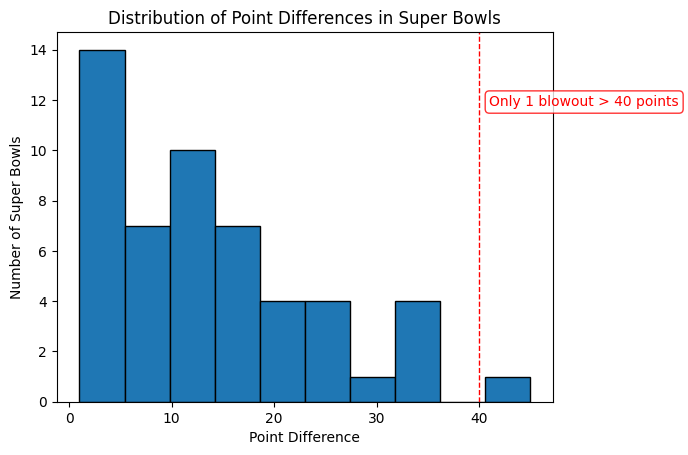

In [9]:
plt.figure()
plt.hist(super_bowls['difference_pts'], edgecolor='black')
plt.axvline(40, color='red', linestyle='dashed', linewidth=1)
plt.text(41, plt.ylim()[1] * 0.8, f"Only {difference} blowout > 40 points", color="red", fontsize=10, ha='left', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8, edgecolor="red")
)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.title('Distribution of Point Differences in Super Bowls')
plt.show()

In [10]:
# Compute most song appearances
songs_per_musician = halftime_musicians.groupby('musician')['num_songs'].sum()
songs_per_musician = songs_per_musician.sort_values(ascending=False)
most_songs = songs_per_musician.index[0]
print("Musician with the most songs performed:", most_songs)

Musician with the most songs performed: Justin Timberlake


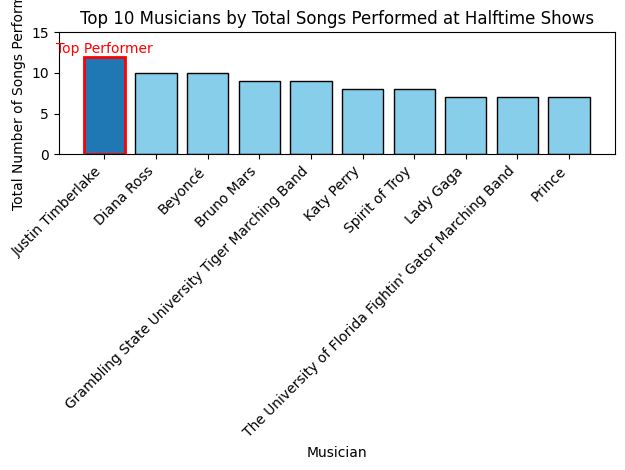

In [11]:
# Plot top 10 musicians by total songs performed
top10 = songs_per_musician.head(10)

plt.figure()
bars = plt.bar(top10.index, top10.to_numpy(), color='skyblue', edgecolor='black')

bars[0].set_color('#1f77b4')  # Highlight the top musician with a different color
bars[0].set_edgecolor('red')
bars[0].set_linewidth(2)

plt.ylim(0, top10.values[0] + 3)  # Set y-axis limit to give space for annotation
plt.text(0, top10.values[0] + 0.5, "Top Performer", color='red', fontsize=10, ha='center')
plt.xlabel('Musician')
plt.ylabel('Total Number of Songs Performed')
plt.title('Top 10 Musicians by Total Songs Performed at Halftime Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()